In [1]:
#Python Library for Dataframe usage
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Libraries for Graph
import networkx as nx

In [2]:
#Serializing to a file
import _pickle as pickle

#Python Libraries for Mongos Database
import pymongo
from pymongo import MongoClient

In [3]:
#PandaDF of ingredients and their associated flavor molecules
#Opening the pickled file
pickle_in = open("./data/ingredients/ingredient_only_pd.pickle", "rb")

#Getting the dictionary from the pickle
ingredient_only_pd = pickle.load(pickle_in)

In [27]:
#Opening the pickled file
pickle_in = open("./data/graph/molecule_full_graph.pickle", "rb")

#Getting the dictionary from the pickle
full_graph = pickle.load(pickle_in)

In [36]:
#returns a dictionary based on attributes
ingredient_node_attribute = nx.get_node_attributes(full_graph, 'ingredient_node')
molecule_node_attribute = nx.get_node_attributes(full_graph, 'molecule_node')

In [37]:
#list of ingredients
ingredient_list = []
for node, boolean in ingredient_node_attribute.items():    
    if boolean == True:
        ingredient_list.append(node)

#list of non ingredients
molecule_list = []
for node, boolean in molecule_node_attribute.items():   
    if boolean == True:
        molecule_list.append(node)

# Ingredient-Molecule Data Frame

In [4]:
ingredient_only_pd.head()

,_id,category,flavor_of_molecules,ingredient,molecule_IDs,molecules,set_molecules,set_molecules_ID,molecule_quantity
0,5ca27b8f13218a1eabac63d6,Animal Product,"[[faint], [very strong, mothball, animal, f...",egg,"[6322, 6736, 31252, 7909, 7284, 7501, 9609, 12...","[L-arginine, 3-Methylindole, 2,5-Dimethylpyraz...","{phenol, 5-Methylfurfural, Octan-2-one, 2,5-Di...","{798, 11552, 31289, 5321950, 12232, 878, 53111...",55
9,5ca27b9b13218a1eabac63df,Beverage Alcoholic,"[[caramellic, spicy], [hop_oil, apricot, wh...",beer,"[5367531, 7795, 20083, 10558, 16617, 12209, 22...","[(2E,4E)-Undeca-2,4-dienal, Isoamyl butyrate, ...","{23747-48-0, 2-Methoxy-4-Methylphenol, Cianida...","{679, 19707, 11552, 31283, 637775, 643731, 528...",263
11,5ca27b9d13218a1eabac63e1,Beverage Alcoholic,"[[fragrant, bread, woody, sweet, baked, a...",brandy,"[7362, 20653, 5364399, 61386, 12327, 7762, 805...","[2-Furaldehyde, 2-Methylhexanoic Acid, Ethyl 2...","{trans-2-Hexen-1-Ol, Ethyl Cinnamate, Ethyl Un...","{7344, 19310, 8038, 11508, 61386, 1049, 8468, ...",50
13,5ca27ba013218a1eabac63e3,Beverage Alcoholic,"[[fragrant, bread, woody, sweet, baked, a...",apple brandy,"[7362, 20653, 5364399, 61386, 9862, 7775, 1661...","[2-Furaldehyde, 2-Methylhexanoic Acid, Ethyl 2...","{trans-2-Hexen-1-Ol, Ethyl Cinnamate, Ethyl Un...","{7344, 19310, 31249, 10448, 8038, 9862, 11508,...",74
15,5ca27ba313218a1eabac63e5,Beverage Alcoholic,"[[fragrant, bread, woody, sweet, baked, a...",blackberry brandy,"[7362, 20653, 5364399, 61386, 12327, 7762, 805...","[2-Furaldehyde, 2-Methylhexanoic Acid, Ethyl 2...","{trans-2-Hexen-1-Ol, Ethyl Cinnamate, Ethyl Un...","{7344, 19310, 8038, 177, 11508, 61386, 1049, 8...",51


In [5]:
print("List of catgories of food: ", ingredient_only_pd["category"].unique())

List of catgories of food:  ['Animal Product' 'Beverage Alcoholic' 'Beverage Caffeinated' 'Cereal'
 'Maize' 'Dairy' 'Essential Oil' 'Seafood' 'Fish' 'Flower' 'Fruit' 'Berry'
 'Fruit Citrus' 'Fruit Essence' 'Fungus' 'Herb' 'Meat' 'Nut' 'Seed'
 'Legume' 'Plant' 'Plant Derivative' 'Spice' 'Vegetable' 'Gourd'
 'Vegetable Root' 'Vegetable Stem' 'Vegetable Tuber' 'Cabbage' 'Additive']


In [6]:
print("number of ingredients: ", len(ingredient_only_pd["ingredient"]))

number of ingredients:  268


In [28]:
print("number of possible combinations: ", 268 * 267)

number of possible combinations:  71556


In [39]:
print("number of molecules: ", len(molecule_list))

number of molecules:  1467


In [7]:
ingredient_only_pd["molecule_quantity"].describe()

count    268.000000
mean      98.694030
std       76.326004
min        1.000000
25%       20.750000
50%      102.500000
75%      149.000000
max      391.000000
Name: molecule_quantity, dtype: float64

(array([86., 19., 50., 53., 32., 16.,  9.,  2.,  0.,  1.]),
 array([  1.,  40.,  79., 118., 157., 196., 235., 274., 313., 352., 391.]),
 <a list of 10 Patch objects>)

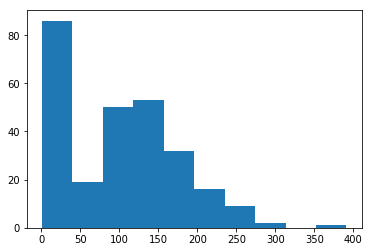

In [8]:
plt.hist(ingredient_only_pd["molecule_quantity"])

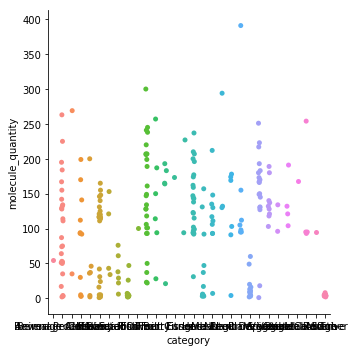

In [9]:
sns.catplot(x = "category", y = "molecule_quantity", data = ingredient_only_pd)

# Graphs

# Ingredient Only Graphs

In [10]:
#Opening the pickled file for full graph
pickle_in = open("./data/graph/ingredient_subset_graph.pickle","rb")
ing_graph = pickle.load(pickle_in)

/home/ryoiwata/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


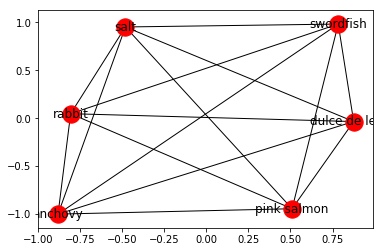

In [11]:
nx.draw_networkx(ing_graph)

# Ingredient and Molecule Graph

In [12]:
#Opening the pickled file for full graph
pickle_in = open("./data/graph/molecule_subset_graph.pickle","rb")
mol_graph = pickle.load(pickle_in)

/home/ryoiwata/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


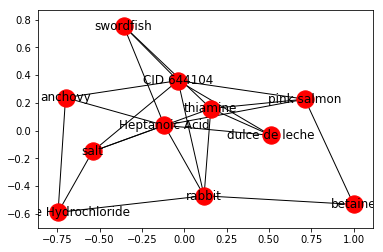

In [13]:
nx.draw_networkx(mol_graph)

# Common Pairing Shared Molecule Ratios

In [14]:
def common_pair_analysis(ing1, ing2):
    demo_G=nx.Graph()
    mol_list = []
    #iterate through each row of flavorDB based on if index is in random sample
    for index, row in ingredient_only_pd.iterrows():
        #set of the ingredient from the "rows"
        set_mol= row["set_molecules"]
        #name of the ingredient from the "rows" 
        ingredient_1 = row["ingredient"]

        if ingredient_1 in [ing1, ing2]:
            mol_list.append(set_mol)
            for molecule in set_mol:
                # flavor_matrix_df[ingredient_1][molecule] = {'weight': 1}
                demo_G.add_node(ingredient_1)
                demo_G.node[ingredient_1]["ingredient_node"] = True
                demo_G.add_node(molecule)
                demo_G.node[molecule]["molecule_node"] = True
                demo_G.add_edge(ingredient_1, molecule)
    ingredient_nodes = nx.get_node_attributes(demo_G, 'ingredient_node').keys()
    molecule_nodes = nx.get_node_attributes(demo_G, 'molecule_node').keys()
    pos=nx.spring_layout(demo_G)
    nx.draw_networkx_nodes(demo_G,pos,
                           nodelist=ingredient_nodes,
                           node_color='r',
                           node_size=500,
                       alpha=0.8)
    nx.draw_networkx_nodes(demo_G,pos,
                           nodelist=molecule_nodes,
                           node_color='b',
                           node_size=500,
                       alpha=0.8)
    shared_molecules = mol_list[0].intersection(mol_list[1])
    mol_for_ing_1 = mol_list[0].difference(mol_list[1])
    mol_for_ing_2 = mol_list[1].difference(mol_list[0])
    print("number of shared molecules: ", len(shared_molecules))
    print("number of unique molecules to {}: ".format(ing1), len(mol_for_ing_1))
    print("number of unique molecules to {}: ".format(ing2), len(mol_for_ing_2))
    print("ratio of shared to total: ", len(shared_molecules) / len(mol_list[1].union(mol_list[0])))

number of shared molecules:  56
number of unique molecules to milk:  213
number of unique molecules to coffee:  55
ratio of shared to total:  0.1728395061728395


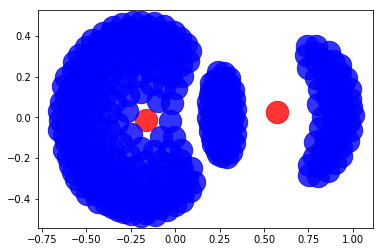

In [15]:
common_pair_analysis("milk", "coffee")

number of shared molecules:  1
number of unique molecules to celery:  8
number of unique molecules to peanut butter:  216
ratio of shared to total:  0.0044444444444444444


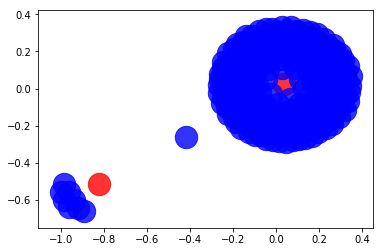

In [16]:
common_pair_analysis("celery", "peanut butter")

number of shared molecules:  17
number of unique molecules to cherry tomato:  103
number of unique molecules to mozzarella cheese:  77
ratio of shared to total:  0.08629441624365482


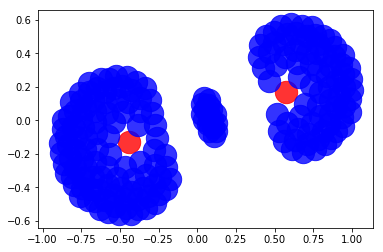

In [17]:
common_pair_analysis("cherry tomato", "mozzarella cheese")

number of shared molecules:  4
number of unique molecules to ketchup:  265
number of unique molecules to coffee:  1
ratio of shared to total:  0.014814814814814815


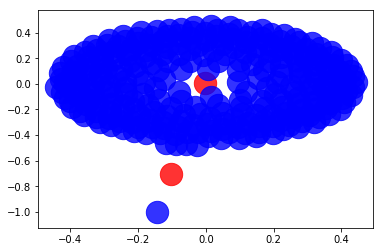

In [18]:
common_pair_analysis("ketchup", "coffee")

In [19]:
list(ingredient_only_pd["ingredient"])

['egg',
 'beer',
 'brandy',
 'apple brandy',
 'blackberry brandy',
 'cherry brandy',
 'pear brandy',
 'plum brandy',
 'raspberry brandy',
 'weinbrand brandy',
 'gin',
 'rum',
 'bourbon whisky',
 'japanese whisky',
 'wine',
 'champagne',
 'cider',
 'plum wine',
 'port wine',
 'red wine',
 'rose wine',
 'sake',
 'sherry',
 'strawberry wine',
 'white wine',
 'coffee',
 'green tea',
 'barley',
 'oats',
 'rice',
 'corn',
 'corn oil',
 'popcorn',
 'sweetcorn',
 'butter',
 'buttermilk',
 'cheese',
 'blue cheese',
 'cheddar cheese',
 'cottage cheese',
 'cream cheese',
 'feta cheese',
 'goat cheese',
 'gruyere cheese',
 'mozzarella cheese',
 'parmesan cheese',
 'provolone cheese',
 'romano cheese',
 'roquefort cheese',
 'swiss cheese',
 'ghee',
 'milk',
 'goat milk',
 'milk powder',
 'skimmed milk',
 'yogurt',
 'lemon grass',
 'orange oil',
 'clary sage',
 'clam',
 'crab',
 'lobster',
 'oyster',
 'shrimp',
 'caviar',
 'codfish',
 'fish',
 'salmon',
 'artichoke',
 'apple',
 'apricot',
 'avocado'

# Recommender

In [20]:
from src.recommender.lists_walk_recommender import random_walk_jacaard_lists

/home/ryoiwata/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


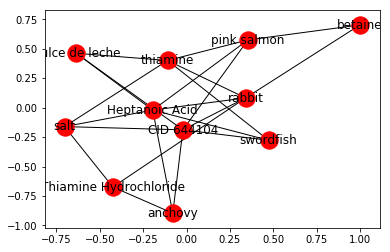

In [22]:

nx.draw_networkx(mol_graph)

In [26]:
ingredient_1 = "mozzarella cheese"
iterations = 10000
steps = 10
return_prob = 0.001
print(random_walk_jacaard_lists(ingredient_1, iterations, steps, return_prob))

Counter({'tea': 136, 'strawberry': 127, 'coffee': 121, 'papaya': 117, 'cocoa': 113, 'rum': 113, 'potato': 112, 'apple': 110, 'pepper': 90, 'white wine': 89, 'spearmint': 88, 'mango': 87, 'peach': 87, 'celery': 87, 'beer': 85, 'mushroom': 85, 'pineapple': 83, 'melon': 81, 'orange': 79, 'ginger': 77, 'banana': 77, 'mozzarella cheese': 76, 'lemon': 75, 'coconut': 75, 'green beans': 75, 'olive': 75, 'gruyere cheese': 75, 'apricot': 73, 'rosemary': 72, 'asparagus': 71, 'lima beans': 71, 'sherry': 70, 'raspberry': 70, 'pork': 70, 'red wine': 69, 'corn': 68, 'plum': 68, 'peanut': 68, 'carrot': 67, 'cumin': 67, 'beans': 67, 'blue cheese': 67, 'cardamom': 67, 'oregano': 66, 'basil': 66, 'sesame': 66, 'sage': 66, 'thyme': 65, 'marjoram': 65, 'dill': 65, 'onion': 65, 'blackberry': 65, 'parmesan cheese': 65, 'wine': 64, 'oats': 64, 'mandarin orange': 64, 'coriander': 63, 'lemon balm': 63, 'parsley': 62, 'cheddar cheese': 62, 'rice': 61, 'plum wine': 60, 'kiwifruit': 59, 'anise': 59, 'pecans': 58, 

In [29]:
ingredient_1 = "crab"
iterations = 10000
steps = 10
return_prob = 0.001
print(random_walk_jacaard_lists(ingredient_1, iterations, steps, return_prob))

Counter({'tea': 128, 'apple': 120, 'cocoa': 114, 'beer': 103, 'papaya': 103, 'spearmint': 100, 'ginger': 100, 'coffee': 96, 'rum': 96, 'mango': 92, 'potato': 92, 'white wine': 91, 'orange': 89, 'peanut': 88, 'mushroom': 86, 'cinnamon': 86, 'sherry': 84, 'strawberry': 83, 'green beans': 83, 'celery': 82, 'apricot': 82, 'dill': 80, 'plum': 79, 'oregano': 79, 'peach': 78, 'pepper': 77, 'banana': 77, 'pineapple': 76, 'allspice': 75, 'corn': 74, 'cardamom': 74, 'rice': 73, 'raspberry': 72, 'swiss cheese': 72, 'nutmeg': 71, 'oats': 71, 'marjoram': 70, 'grapefruit': 70, 'melon': 70, 'parmesan cheese': 70, 'beans': 69, 'lettuce': 69, 'blackberry': 68, 'basil': 67, 'chicken': 67, 'vanilla': 67, 'carrot': 67, 'coriander': 66, 'lima beans': 66, 'parsley': 66, 'wine': 65, 'lemon': 64, 'eggplant': 64, 'lemon balm': 63, 'roquefort cheese': 63, 'coconut': 62, 'blue cheese': 61, 'lime': 61, 'onion': 60, 'thyme': 60, 'cumin': 59, 'garlic': 59, 'asparagus': 59, 'pork': 59, 'rosemary': 58, 'gruyere chees

In [30]:
ingredient_1 = "beer"
iterations = 10000
steps = 10
return_prob = 0.001
print(random_walk_jacaard_lists(ingredient_1, iterations, steps, return_prob))

Counter({'tea': 154, 'orange': 120, 'beer': 117, 'cocoa': 116, 'papaya': 113, 'coffee': 113, 'apple': 109, 'rosemary': 93, 'pineapple': 92, 'mushroom': 92, 'mango': 92, 'melon': 87, 'potato': 84, 'white wine': 83, 'strawberry': 82, 'apricot': 82, 'ginger': 82, 'vanilla': 81, 'peach': 81, 'spearmint': 81, 'plum': 80, 'green beans': 79, 'basil': 77, 'peanut': 76, 'rum': 74, 'oregano': 74, 'pork': 74, 'pear': 74, 'red wine': 74, 'coriander': 73, 'corn': 72, 'sherry': 72, 'pepper': 72, 'cinnamon': 71, 'peas': 70, 'sage': 70, 'onion': 69, 'olive': 69, 'swiss cheese': 68, 'cardamom': 67, 'dill': 67, 'lemon': 67, 'raspberry': 67, 'nutmeg': 66, 'wine': 66, 'rice': 66, 'celery': 66, 'blue cheese': 66, 'gruyere cheese': 65, 'carrot': 65, 'canola oil': 65, 'beans': 64, 'banana': 64, 'garlic': 64, 'lima beans': 64, 'plum wine': 64, 'winter savory': 63, 'champagne': 63, 'oats': 62, 'mint': 62, 'marjoram': 61, 'mozzarella cheese': 61, 'asparagus': 61, 'coconut': 60, 'thyme': 60, 'mandarin orange': 6

# Recipe Based Graph

In [23]:
#accessing mongoDB
client = MongoClient()
database = client['food_map']   # Database name (to connect to)
collections = database['recipe']

#Getting the dataset from MongoDB into Pandas
recipe_puppy_pandas = pd.DataFrame(list(collections.find()))

In [24]:
recipe_puppy_pandas.shape

(172942, 5)

In [25]:
recipe_puppy_pandas.head()

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient
0,5caa762213218a112b0b979f,"[dashi, egg, egg noodles, mushroom, salt, seas...",http://www.grouprecipes.com/31653/egg-noodles-...,Egg Noodles With Wonton Egg And Veggie Recipe,egg
1,5caa762213218a112b0b97a0,"[egg, water]",http://www.recipezaar.com/Egg-Peeling-for-Egg-...,Egg Peeling for Egg Salad,egg
2,5caa762213218a112b0b97a1,"[black pepper, celery, cucumber, curry powder,...",http://www.recipezaar.com/Curried-Egg-Salad-on...,Curried Egg Salad on a Bed of Greens -- an Egg...,egg
3,5caa762213218a112b0b97a2,"[baking powder, butter, egg, green onion, rame...",http://www.recipezaar.com/Ramen-Noodle-Egg-Foo...,Ramen Noodle Egg Foo Yung,egg
4,5caa762213218a112b0b97a3,"[bacon, black pepper, cheese, egg, salt]",http://www.recipezaar.com/Bacon-and-Egg-Cups-1...,Bacon and Egg Cups,egg


In [31]:
#Opening the pickled file
#Needs to be opened in the recommender folder
pickle_in = open("./data/graph/recipe_graph.pickle","rb")

#Getting the dictionary from the pickle
recipe_full_graph = pickle.load(pickle_in)

In [34]:
print("number of ingredients: ", recipe_graph.number_of_nodes())

number of ingredients:  1664


In [35]:
print("number of edges: ", recipe_graph.number_of_edges())

number of edges:  194682


In [43]:
#Opening the pickled file
#Needs to be opened in the recommender folder
pickle_in = open("./data/graph/recipe_subset_graph.pickle","rb")

#Getting the dictionary from the pickle
recipe_subset_graph = pickle.load(pickle_in)

/home/ryoiwata/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


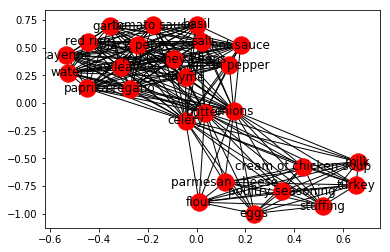

In [44]:

nx.draw_networkx(recipe_subset_graph)

In [45]:
print("recipe name: Turkey Stuffing Casserole, New Orleans Red Beans And Rice Recipe")

recipe name: Turkey Stuffing Casserole, New Orleans Red Beans And Rice Recipe
